In [5]:
import nltk
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [7]:
data = pd.read_csv(r"C:\Users\luyil\Downloads\archive (3)\emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


<Axes: ylabel='spam'>

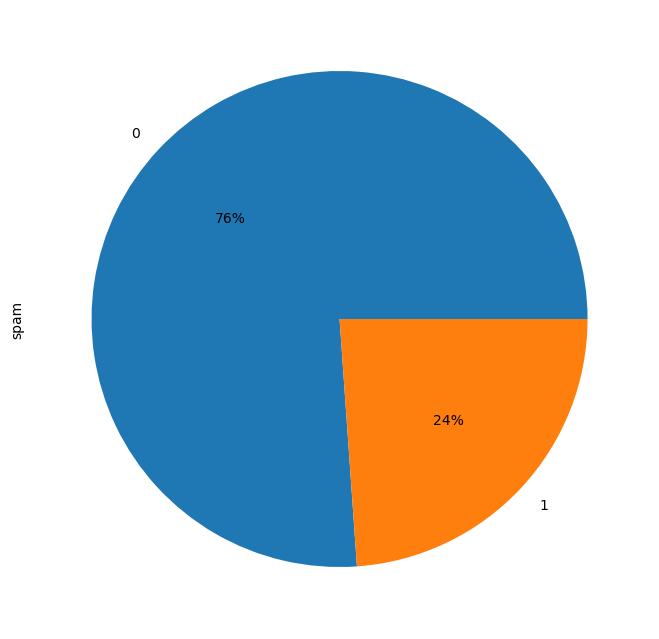

In [10]:
plt.rcParams["figure.figsize"] = [8,10]
data.spam.value_counts().plot(kind="pie",autopct="%1.0f%%")

In [19]:
from nltk.corpus import stopwords

stop = stopwords.words("english")
data["test_without_sw"] = data["text"].apply(lambda x:' '.join([item for item in x.split() if item not in stop]))
data["test_without_sw"]

0       Subject: naturally irresistible corporate iden...
1       Subject: stock trading gunslinger fanny merril...
2       Subject: unbelievable new homes made easy im w...
3       Subject: 4 color printing special request addi...
4       Subject: money , get software cds ! software c...
                              ...                        
5723    Subject: : research development charges gpg ! ...
5724    Subject: : receipts visit jim , thanks invitat...
5725    Subject: : enron case study update wow ! day ....
5726    Subject: : interest david , please , call shir...
5727    Subject: news : aurora 5 . 2 update aurora ver...
Name: test_without_sw, Length: 5728, dtype: object

In [22]:
data_spam = data[data["spam"]==1]
plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(data_spam["test_without_sw"])

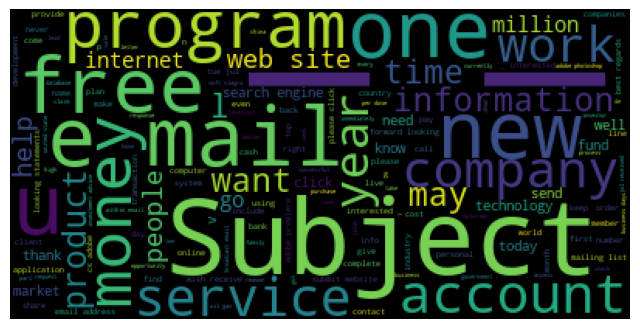

In [24]:
wc = WordCloud().generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

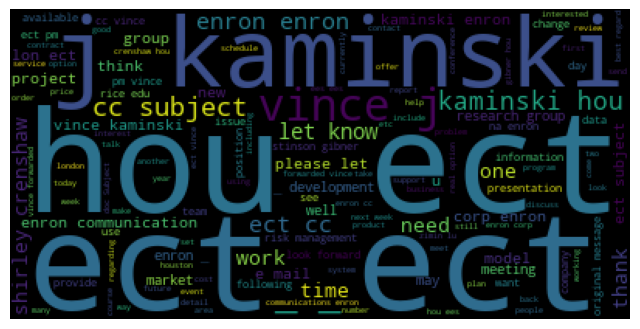

In [25]:
data_non_spam = data[data["spam"]==0]
plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(data_non_spam["test_without_sw"])
wc2 = WordCloud().generate(text)
plt.imshow(wc2)
plt.axis("off")
plt.show()

In [26]:
X = data["text"]
y = data["spam"]

In [27]:
def clean_data(doc):
    document = re.sub("[^a-zA-Z]"," ",doc)
    document = re.sub(r"\s+[^a-zA-Z]\s"," ",document)
    document = re.sub(r"\s+"," ",document)
    return document

In [28]:
X_cleaned = []
reviews = list(X)
for r in reviews:
    X_cleaned.append(clean_data(r))

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500,min_df=5,max_df=0.7,stop_words=stopwords.words("english"))
X = vectorizer.fit_transform(X_cleaned).toarray()

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.naive_bayes import MultinomialNB

spam_detector = MultinomialNB()
spam_detector.fit(X_train,y_train)

MultinomialNB()

In [36]:
y_pred = spam_detector.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[849   7]
 [ 18 272]]
0.9781849912739965
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       856
           1       0.97      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146



In [38]:
print(X_cleaned[50])
print(y[50])

Subject prop sal dear siobhan riskin our company will place any business with a qualified website permanently at the top of the major search engines guaranteed never to move eg yahoo msn alta vista etc if you are interested in being guaranteed first position in the top search engines at a promotional fee please contact us at hannah speedy com pe please include the url s your are interested in promoting this is not pay per click examples will be provided sincerely the search engine placement specialists if you wish to be removed please respond to hannah speedy com pe and type the word remove in your subject line
1


In [39]:
print(spam_detector.predict(vectorizer.transform([X_cleaned[50]])))

[1]
